# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

#### Importing Libraries

In [85]:
# Importing packages:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs
import os
import warnings

warnings.filterwarnings("ignore")

seed = 0


#### Load Dataset [Whole Sale Customers Data set](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

In [86]:
# Load Dataset:
WS_df = pd.read_csv('C:/Users/simon/Project---ML--Unsupervised-Learning/Wholesale_Data.csv')

WS_df.head


<bound method NDFrame.head of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4  

##### Below we can notice that there are no missing or null values.

In [87]:
WS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [88]:
WS_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


#### Data Visualizations:

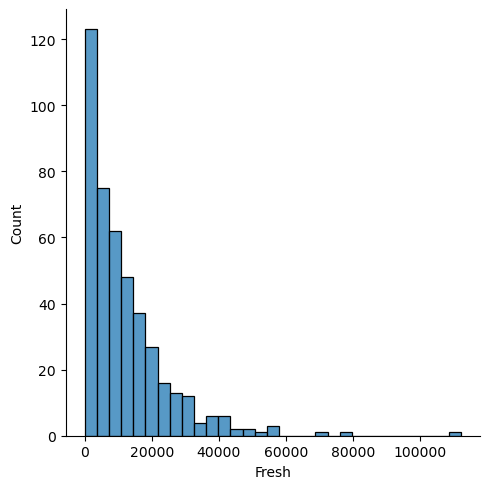

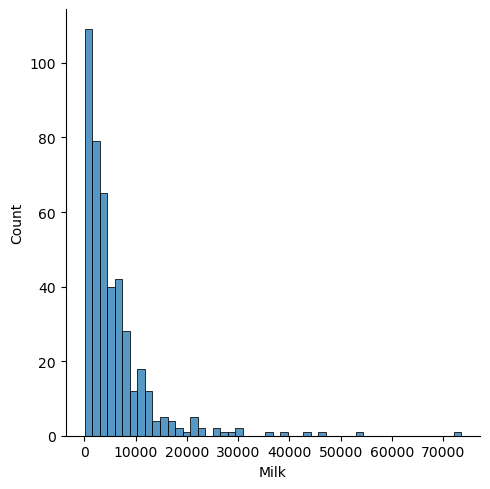

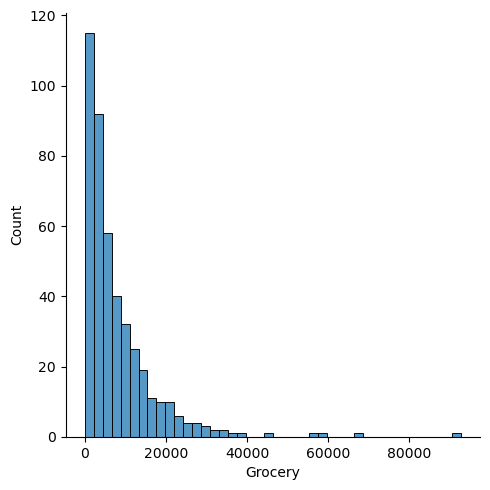

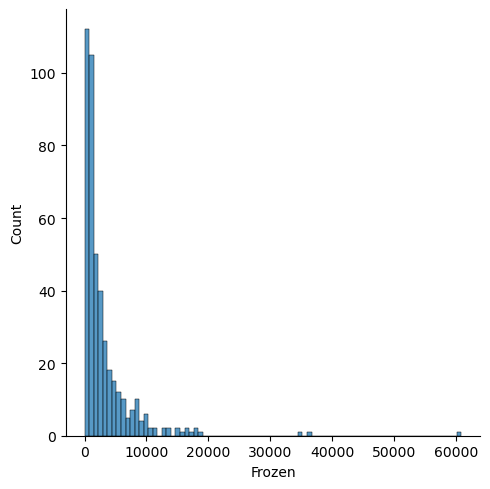

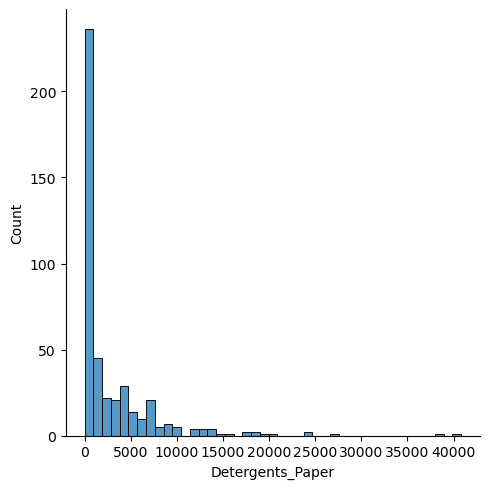

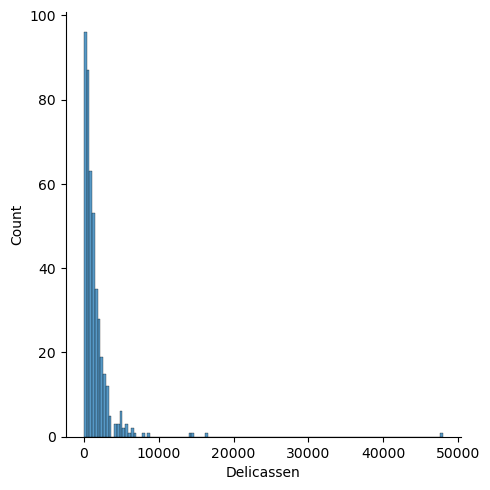

In [89]:
num_feat = WS_df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
for column in num_feat:
    sns.displot(num_feat[column])

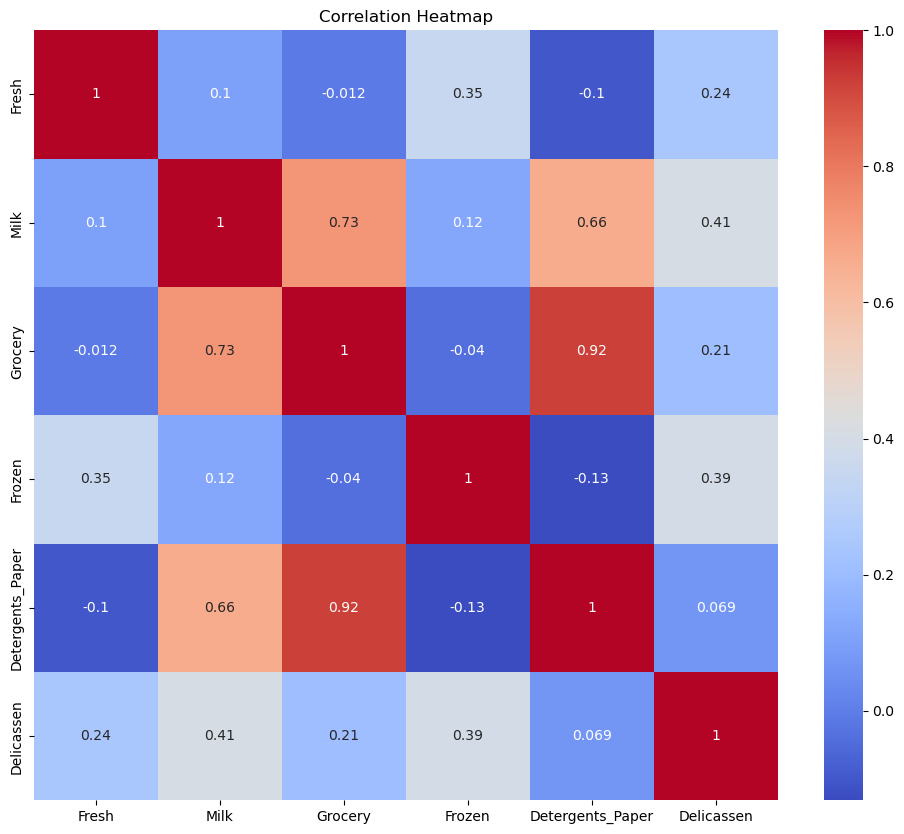

In [90]:
# Using a heatmap to observe the correlations between the dollar spending of customers on d/t products:
corr_matrix = num_feat.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

#### From the above heatmap it looks like there are correlations between:
- 1. Milk & Grocery (0.73)
- 2. Milk & Deteregent_Paper(0.66)
- 3. Grocery & Detergent_Paper(0.92)

- Thus for closer look in to the correlation will create three scatter plots on the above.

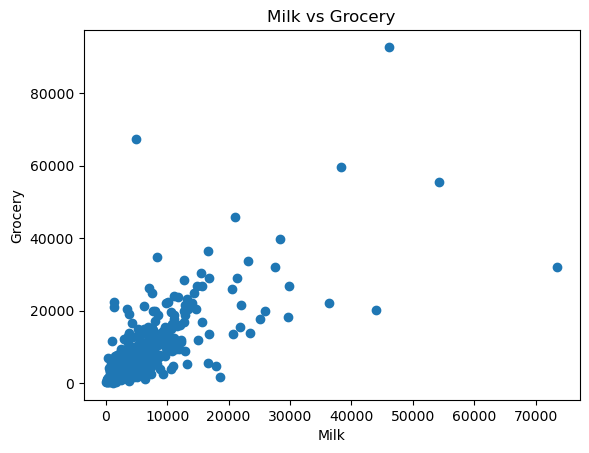

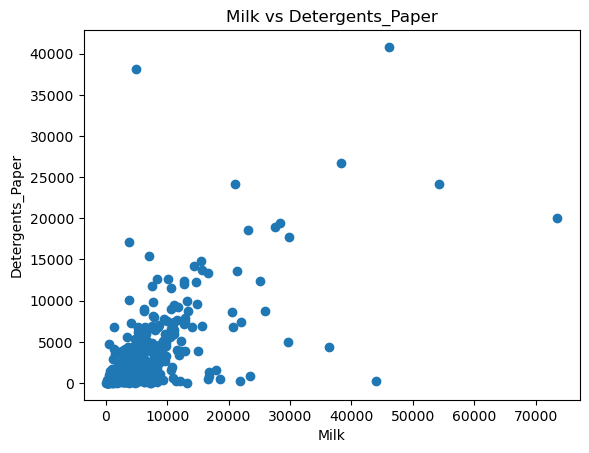

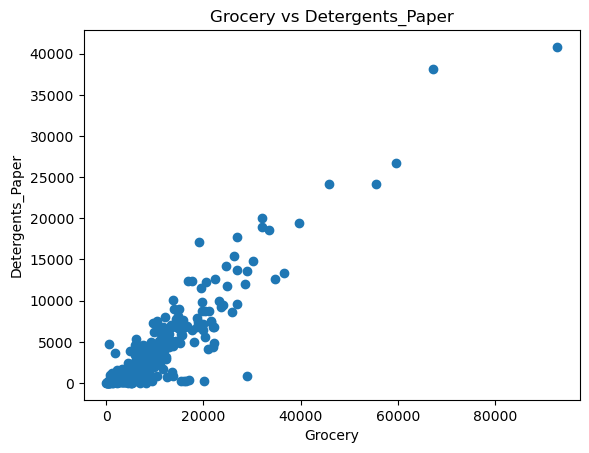

In [91]:
# Scatter plot between Milk and Grocery
plt.scatter(num_feat['Milk'], num_feat['Grocery'])
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('Milk vs Grocery')
plt.show()

# Scatter plot between Milk and Detergents_Paper
plt.scatter(num_feat['Milk'], num_feat['Detergents_Paper'])
plt.xlabel('Milk')
plt.ylabel('Detergents_Paper')
plt.title('Milk vs Detergents_Paper')
plt.show()

# Scatter plot between Grocery and Detergents_Paper
plt.scatter(num_feat['Grocery'], num_feat['Detergents_Paper'])
plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')
plt.title('Grocery vs Detergents_Paper')
plt.show()



- Observation on the above Scatter Plots: Note that We can clearly see the relationship on the pairs of the above product columns and specially the relathionship between Grocery and Detergent_Paper looks linear.

### Feature Engineering `(One-hot encoding & Scaling Data)`

In [92]:
# Converting the Categorical variables of Channel & Region in to binaries:

Encoded_WS_df = pd.get_dummies(WS_df, columns=['Channel', 'Region'])
Encoded_WS_df = Encoded_WS_df.astype(int) # to just put them in 1 & 0 instead of True & False
Encoded_WS_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1,0,0,0,1
436,39228,1431,764,4510,93,2346,1,0,0,0,1
437,14531,15488,30243,437,14841,1867,0,1,0,0,1
438,10290,1981,2232,1038,168,2125,1,0,0,0,1


In [93]:
# Scaling the numerical features to avoid dominance of one feature over the other:
from sklearn.preprocessing import StandardScaler
num_feats = Encoded_WS_df[['Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper','Delicassen']]
scaler = StandardScaler() # StandardScaler initiated

Scaled_df_WS =  pd.DataFrame(scaler.fit_transform(num_feats), columns = num_feats.columns)
Scaled_df_WS  # For our purpose we will need only the numerical features so we will continue with this dataframe.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


### Normalizing Distribution of features:

        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0    0.051580  0.421055 -0.041984 -0.890056         -0.044546   -0.068642
1   -0.496433  0.434673  0.157276 -0.314897          0.082876    0.085399
2   -0.592450  0.342552 -0.028561 -0.147962          0.125073    1.176589
3    0.095411 -0.978219 -0.499188  0.523037         -0.690328    0.089302
4    0.609896 -0.053819 -0.082682  0.160296         -0.263859    0.832625
..        ...       ...       ...       ...               ...         ...
435  0.876015  0.614345  0.615597  1.123377         -0.836627    0.215991
436  1.149081 -0.896837 -1.415371  0.259715         -0.880727    0.255805
437  0.182593  0.839267  1.208479 -0.783903          1.255963    0.114628
438 -0.145470 -0.728848 -0.922595 -0.543763         -0.843436    0.193135
439 -1.306770 -0.811760 -0.851503 -0.967832         -0.702970   -0.739965

[440 rows x 6 columns]


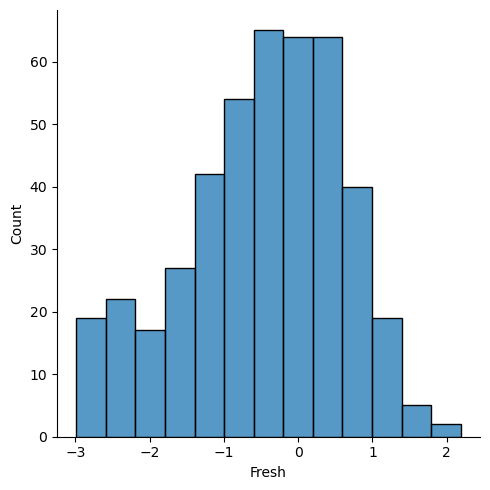

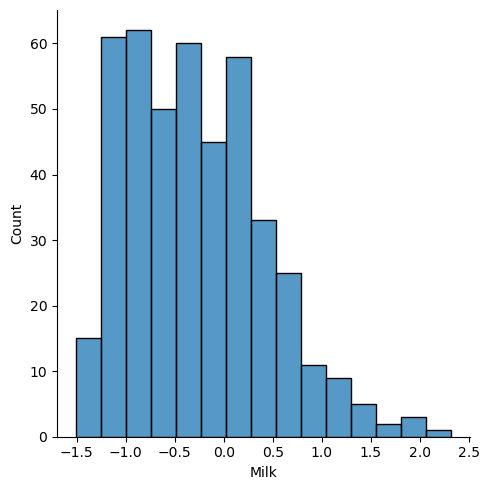

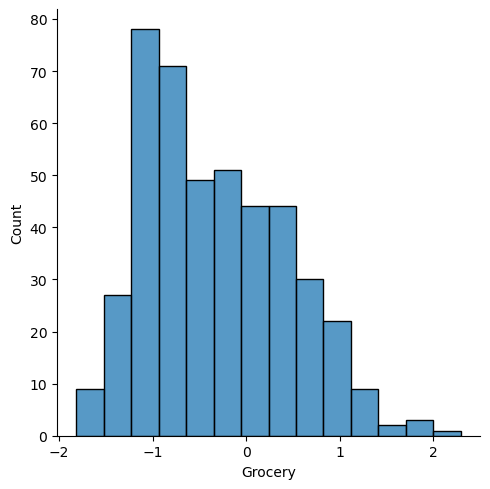

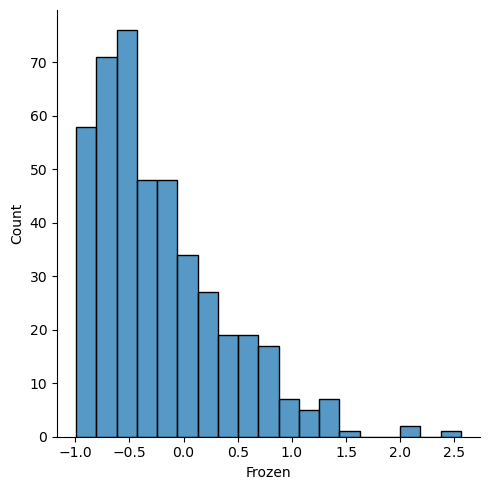

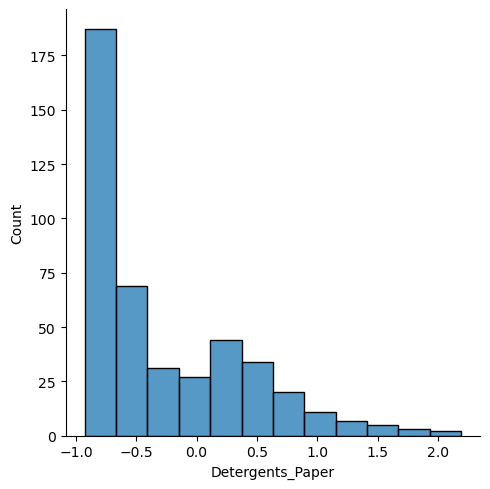

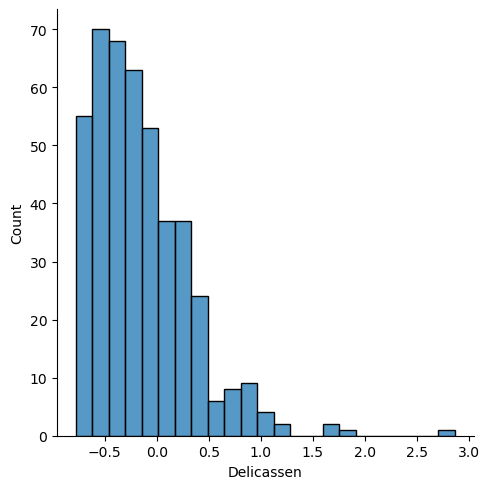

In [94]:
#As most ML models assume normal distribution we will try to improve distribution using log.transform:
Scaled_log = np.log1p(Scaled_df_WS)

print(Scaled_log)
for column in Scaled_log:
    sns.displot(Scaled_log[column])

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [95]:
# For our purpose we are selecting the numerical features.

X = Scaled_log
X

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.051580,0.421055,-0.041984,-0.890056,-0.044546,-0.068642
1,-0.496433,0.434673,0.157276,-0.314897,0.082876,0.085399
2,-0.592450,0.342552,-0.028561,-0.147962,0.125073,1.176589
3,0.095411,-0.978219,-0.499188,0.523037,-0.690328,0.089302
4,0.609896,-0.053819,-0.082682,0.160296,-0.263859,0.832625
...,...,...,...,...,...,...
435,0.876015,0.614345,0.615597,1.123377,-0.836627,0.215991
436,1.149081,-0.896837,-1.415371,0.259715,-0.880727,0.255805
437,0.182593,0.839267,1.208479,-0.783903,1.255963,0.114628
438,-0.145470,-0.728848,-0.922595,-0.543763,-0.843436,0.193135


In [96]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3,init='k-means++', n_init ='auto')
km.fit(X)



KMeans(n_clusters=3, n_init='auto')

In [97]:
y_pred = km.predict(X)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 2,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2,
       2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 0, 0, 0, 1, 1, 2, 0, 2, 1, 1, 0,
       1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2,
       1, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 0, 0, 1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 0, 1, 2, 1, 1, 0, 2, 1,

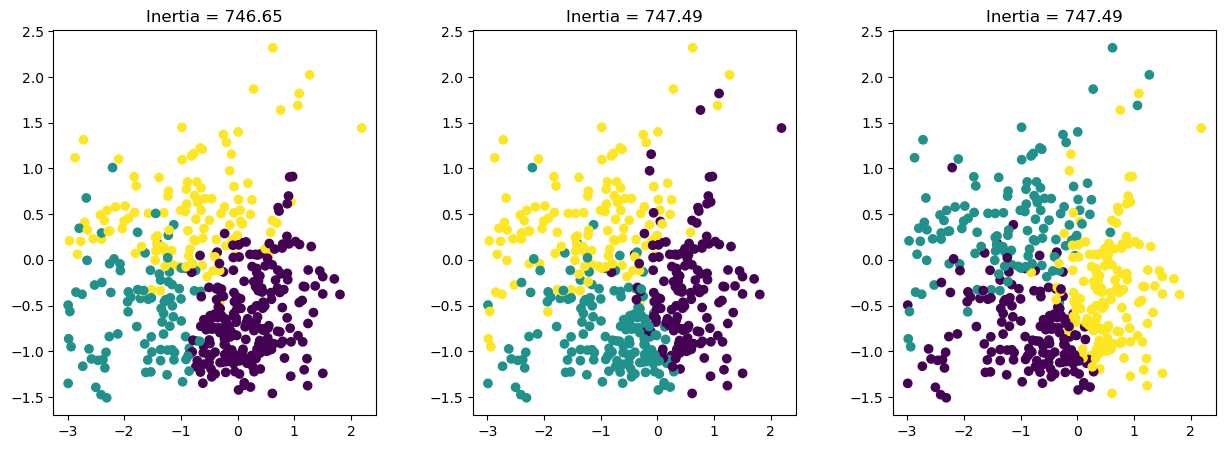

In [98]:
# Calculating enertia for the model to evaluate our clustering:
fig, ax = plt.subplots(1, 3, gridspec_kw={'wspace': 0.3}, figsize=(15,5))
for i in range(3):
    km = KMeans(n_clusters = 3, init='random', n_init=1, random_state=i)
    km.fit(X)
    ax[i].scatter(x= X.iloc[:, 0], y=X.iloc[:, 1], c= km.labels_)
    ax[i].set_title(f"Inertia = {round(km.inertia_, 2)}");

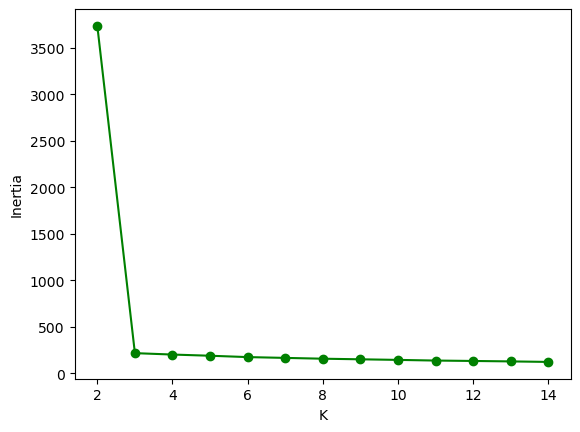

In [99]:
# Plotting Enertia
plt.plot(range(2,15), wcss, 'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Inertia");

- We can notice from the above plot that inertia stops dropping when K is around 3. Thus the ideal number of K is 3

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [103]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# create an object
ac = AgglomerativeClustering(metric='euclidean',
                             linkage='ward',
                             n_clusters = 3)


X_hc = ac.fit_predict(X)
X_hc



array([2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0,
       0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1,
       0, 2, 1, 2, 1, 1, 0, 2, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 0, 1,
       0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2,
       1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 1, 2,
       0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 1, 1, 1, 2, 1, 0], dtype=int64)

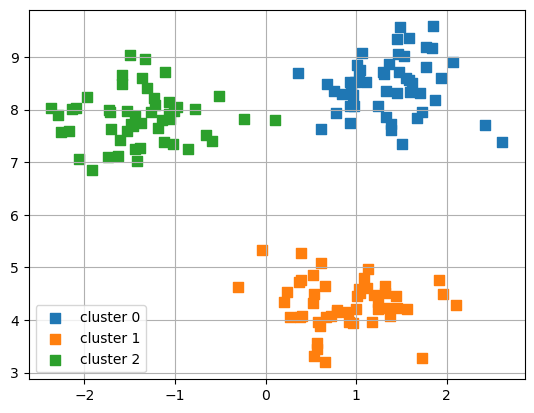

In [104]:
# Plotting Clusters:
y_hc = ac.fit_predict(X)
plot_clusters(X,y_hc)

#### Dendogram

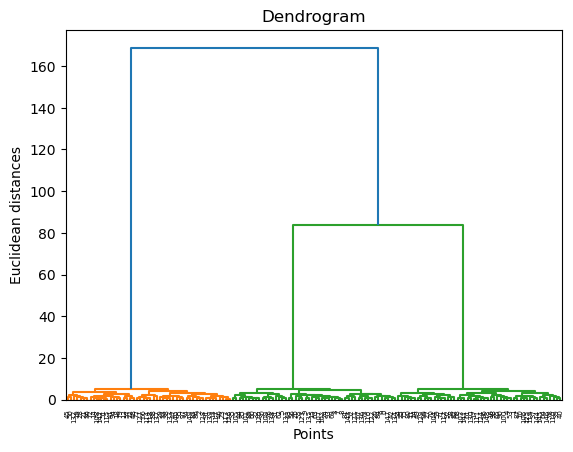

In [105]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

plot_dendrogram(X)

### Based onthe number of vertical lines the number of cluster will be 3.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [102]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X_pca = pca.fit(X)
pc = pca.components_
print(pc)
print(pca.explained_variance_ratio_)

[[ 0.10065655  0.05072453 -0.70477782 -0.2683742  -0.60138072  0.23853726]
 [ 0.18246132 -0.53970708 -0.08465208  0.77871772 -0.24381714  0.04909244]
 [ 0.09771534  0.44285983 -0.29777366  0.28917328 -0.03882302 -0.78773683]]
[0.90184131 0.09021696 0.00239968]


### The three components explain around **`85% (44.08%+ 28.4% +12.33%)`** of the variance in the data that means they capture the most important vairablity in the original six dimension dataset. Thus we can reduce dimention in to 3.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

## 1. Noticed from the distribution plot of  the 6 product that they are not normally distributed.

## 2. From the above heatmap we noticed that there was significant relationship between Milk & Grocery, Milk & Detergent_Paper and at last but not least between Grocery & Detergent_Paper

## 3. The result of the Kmeans clustering show that the optimal number of clusters is 3. That means the 6 products features can be reduced in to three categories based on their underlying patterns and relationships.

## 4. The hierarchical as well grouped the products in to three clusters based on the dendogram plot.

## 5. The result of the PCA show that dimensions can be reduced to 3(from the 6 dimensional dataset) as the three components explain around 85%  of the variablity in the dataset.

## 6. Since all the results are the similar we can concluse  the annual spending can be cateogrized in to three categories based on the underlying relationship and correlation on the product category features.


